In [1]:
# Man führt eine Zelle aus, indem man Shift+Enter drückt, oder das "Play" Symbol in der Toolbar verwendet
# Hier werden verschiedene Bibliotheken für später geladen 
%matplotlib inline
import numpy, matplotlib.pyplot as plt
from mu_analysis import LorentzVector, read_events

In [2]:
# Hier ist ein Beispiel, wie man Lorentzvektoren (LV) mit zusätzlich gespeicherter Ladung erstellen kann
# Die Konvention hier ist, dass alle Energien, Massen und Impulse in GeV angegeben sind.
p1 = LorentzVector(pt=10, eta=1.4, phi=0.1, m=0, charge=-1)
p2 = LorentzVector(pt=36, eta=1.4, phi=1.1, m=0, charge=+1)
p3 = p1+p2

In [3]:
# Zugriff auf die Energie des oben definierten Lorentzvektors p1 
p1.E

21.508984653931407

In [4]:
# Man kann auch einfach alle Eigenschaften eines LVs darstellen
p3

(pt=42.25, eta=1.48, phi=0.90, m=18.19, Q=0)

In [5]:
# Rechnungen mit den Lorentzvektoren sind Komponentenweise definiert - und wirken nicht auf die Ladung
p4 = LorentzVector(pt=60, eta=-0.4, phi=0.1, m=500, charge=+1)
2*p4 - p2

(pt=105.01, eta=-0.97, phi=-0.19, m=917.47, Q=0)

In [6]:
# Hier ist ein Beispiel, wie man über alle Ereignisse in der Datei mu_data_nmin2_nmax4_part1.json läuft (es gibt part1-4).
# Das prozessieren dieser Zelle kann relativ lange dauern (markiert durch In[*]) und viel Speicher in anspruch nehmen!
data_mu_pt = []
data_mu_count = []
# Ohne zusätzliche Angaben werden alle Ereignisse prozessiert, die den HLT_Mu30 Trigger passiert haben.
# Das bedeutet, dass der Detektor ein Myon mit > 30 GeV im Ereignis gefunden haben muss.
for muon_list in read_events(['mu_data_nmin2_nmax4_part1.json']):
    # Die Funktion read_events gibt eine Liste mit rekonstruierten Myonen zurück.
    # Sie ist nach dem transversalen Impuls der Myonen sortiert
    if 5 < muon_list[0].pt < 100: # Selektiere Ereignisse in denen pT des ersten Myons zwischen 5 und 100 GeV liegt
        data_mu_pt.append(muon_list[0].pt) # Dies fügt den Transversalimpuls des ersten Myons zur Liste data_mu_pt hinzu
        data_mu_count.append(len(muon_list)) # Dies fügt die Anzahl der rekonstruierten Myonen zur Liste data_mu_count hinzu

Loading ... mu_data_nmin2_nmax4_part1.json
Available Trigger: HLT_Mu3, HLT_Mu5, HLT_Mu8, HLT_Mu12, HLT_Mu15, HLT_Mu20, HLT_Mu24, HLT_Mu30, HLT_Mu40, HLT_Mu60, HLT_Mu100
Finished processing!

In [7]:
# Die Bibliothek "numpy" (https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
# stellt viele statistische Funktionen bereit
numpy.average(data_mu_count), numpy.std(data_mu_count)

(2.7756112387871599, 0.84796899624231403)

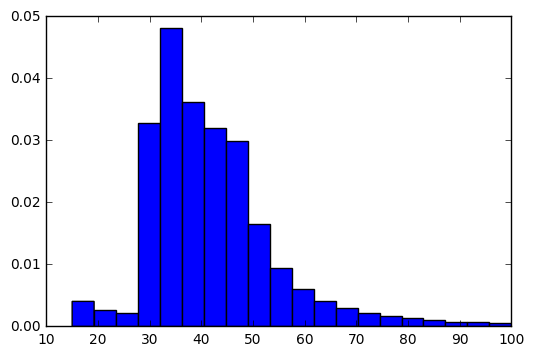

In [8]:
# Zeichnen kann man mit der Bibliothek "matplotlib" (http://matplotlib.org/gallery.html)
# Hier wird ein Histogram mit der pT Verteilung des Myons mit der höchsten Energie im Ereignis gezeichnet
# Obwohl der Trigger HLT_Mu30 verwendet wurde, kann es sein, dass das Myon mit dem höchsten Transversalimpuls
# z.B. nur 5 GeV besitzt. Das liegt daran, dass der Trigger mit "einfach" rekonstruierten Myonen arbeitet,
# aber bei der späteren, detailierteren Rekonstruktion zusätzliche Qualitätskriterien angewendet werden.
values, bins, patch_list = plt.hist(data_mu_pt, bins=20, range=(15,100), normed=True)

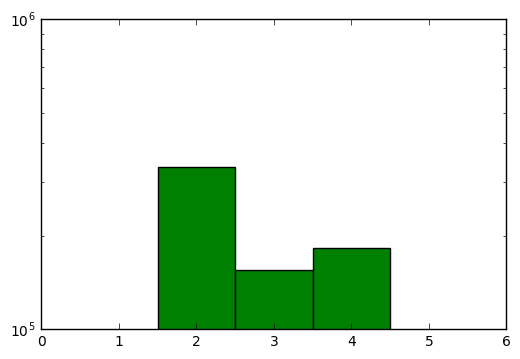

In [9]:
# matplotlib besitzt viele Funktionen, um die Ergebnisse graphisch darzustellen.
# Die Dokumentation für die Funktionen und Optionen befindet sich hier: http://matplotlib.org/api/pyplot_api.html
values, bins, patch_list = plt.hist(data_mu_count, bins=5, range=(0.5,5.5), color='g', log=True)